<a href="https://colab.research.google.com/github/SIT-AIRD-Center/Dataset/blob/main/tutorial_SOCR_HeightWeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 体重から身長を予測する

/content/drive/MyDrive/Dataset/にSOCR-HeightWeight.csvを配置する

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
shutil.copyfile("/content/drive/MyDrive/Dataset/SOCR-HeightWeight.csv",
              "/content/SOCR-HeightWeight.csv")

'/content/SOCR-HeightWeight.csv'

In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
datas = list()

with open("/content/SOCR-HeightWeight.csv", "r") as f:
    r = csv.reader(f)

    items = next(iter(r))

    for R in r:
        _, height, weight = map(float, R)

        # inchをcmに変換する
        height = height * 2.54
        # poundをkgに変換する
        weight = weight * 0.453592

        datas.append( {
            "height" : height,
            "weight" : weight
        } )

#
len(datas)

25000

Text(0, 0.5, 'height(cm)')

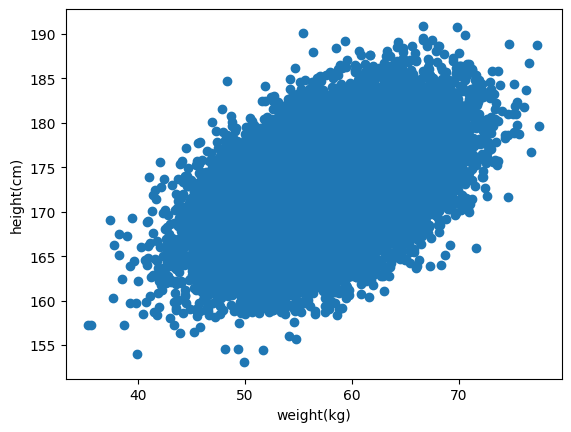

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
weights = [D["weight"] for D in datas]
heights = [D["height"] for D in datas]
ax.scatter(weights, heights)
ax.set_xlabel("weight(kg)")
ax.set_ylabel("height(cm)")

乱数でパラメータを初期化する

(0.8427074936637359, 1.166932994478326)

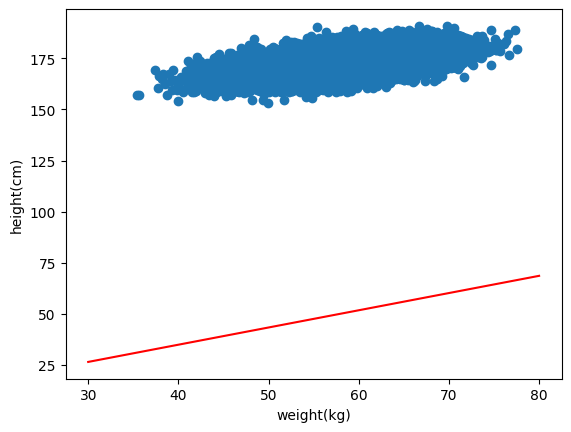

In [44]:
w = np.random.normal()
b = np.random.normal()

fig = plt.figure()
ax = fig.add_subplot()
weights = [D["weight"] for D in datas]
heights = [D["height"] for D in datas]
ax.scatter(weights, heights)
ax.set_xlabel("weight(kg)")
ax.set_ylabel("height(cm)")
tmp_x = np.linspace(30, 80)
ax.plot(tmp_x, tmp_x * w + b, c = "red")

w, b

In [45]:
learning_rate = 0.0001
epochs = 300

for i in range(epochs):
    total_loss = 0
    for D in datas:
        y = w * D["weight"] + b
        loss = ((y - D["height"]) ** 2) / 2

        grad_w = (y - D["height"]) * D["weight"]
        grad_b = (y - D["height"])

        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        total_loss += loss

    total_loss /= len(datas)
    print(f"epoch : {i}, loss : {total_loss}")

epoch : 0, loss : 113.7965657625288
epoch : 1, loss : 109.11260030693249
epoch : 2, loss : 105.08674975053763
epoch : 3, loss : 101.22523565165088
epoch : 4, loss : 97.52135120637911
epoch : 5, loss : 93.96866329490926
epoch : 6, loss : 90.56100131392085
epoch : 7, loss : 87.29244646467428
epoch : 8, loss : 84.15732147818116
epoch : 9, loss : 81.15018075964093
epoch : 10, loss : 78.26580093499258
epoch : 11, loss : 75.49917178322525
epoch : 12, loss : 72.8454875386681
epoch : 13, loss : 70.30013854818867
epoch : 14, loss : 67.85870326880183
epoch : 15, loss : 65.51694059181126
epoch : 16, loss : 63.27078248014923
epoch : 17, loss : 61.116326906146
epoch : 18, loss : 59.0498310774627
epoch : 19, loss : 57.067704939432424
epoch : 20, loss : 55.16650494253069
epoch : 21, loss : 53.342928064159516
epoch : 22, loss : 51.59380607436372
epoch : 23, loss : 49.91610003553002
epoch : 24, loss : 48.306895026519605
epoch : 25, loss : 46.76339508208067
epoch : 26, loss : 45.28291833874867
epoch : 2

(0.4504135944660186, 145.98982445993232)

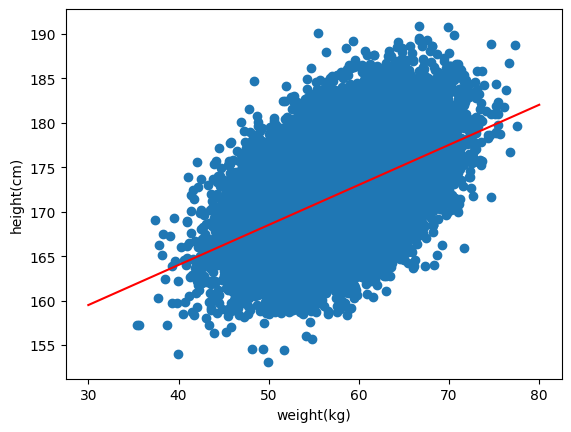

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
weights = [D["weight"] for D in datas]
heights = [D["height"] for D in datas]
ax.scatter(weights, heights)
ax.set_xlabel("weight(kg)")
ax.set_ylabel("height(cm)")
tmp_x = np.linspace(30, 80)
ax.plot(tmp_x, tmp_x * w + b, c = "red")

w, b